In [260]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

import pylab as pl
import math

In [2]:
%pwd

'/Users/pariponthanthong/Desktop/DSC 478/Assignment 3'

## 1 .a

In [4]:
# Import Data
comm = pd.read_csv('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/communities/communities.csv')
comm.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [5]:
# Target Variable
target_var = comm['ViolentCrimesPerPop']

In [6]:
# Drop Target Variable from Main Dataset
comm1 = comm.drop(columns =['ViolentCrimesPerPop','communityname','OtherPerCap'] , axis = 1 )
comm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 97 columns):
state                    1994 non-null int64
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFarmSelf             1994 non-null float64
pctWInvInc               1994 non-null float64
pctWSocSec               1994 non-null float64
pctWPubAsst              1994 non-null float64
pc

In [7]:
# 5 points of statistic
comm1.describe() # no value from communityname ( categorical)

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.102607,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.000000,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.000000,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.010000,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print(y.shape,x.shape)

(1994,) (1994, 98)


## 1.b

#### Using the regression implementation from Machine Learning in Action, Chapter 8:

In [12]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array(comm1)
x = np.array([np.concatenate((v,[1])) for v in x])
x

array([[8.0e+00, 1.9e-01, 3.3e-01, ..., 2.6e-01, 2.0e-01, 1.0e+00],
       [5.3e+01, 0.0e+00, 1.6e-01, ..., 1.2e-01, 4.5e-01, 1.0e+00],
       [2.4e+01, 0.0e+00, 4.2e-01, ..., 2.1e-01, 2.0e-02, 1.0e+00],
       ...,
       [9.0e+00, 1.6e-01, 3.7e-01, ..., 3.2e-01, 1.8e-01, 1.0e+00],
       [2.5e+01, 8.0e-02, 5.1e-01, ..., 3.8e-01, 3.3e-01, 1.0e+00],
       [6.0e+00, 2.0e-01, 7.8e-01, ..., 3.0e-01, 5.0e-02, 1.0e+00]])

In [13]:
y = np.array(target_var)

In [14]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [15]:
w = standRegres(x,y)

In [16]:
# Compute RMSE on full data
yHat = x*w  # Predicted call yHat
yHatT = yHat.T

err = abs(yHatT - y)
total_error = np.dot(err,err.T)

rmse = np.sqrt(total_error/len(yHat))
print(rmse) 
#print(yHatT.shape,y.shape)
#print(err.shape)

[[0.12876171]]


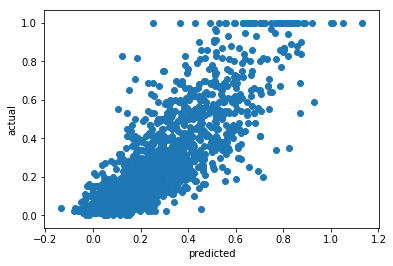

In [24]:
## Plot Predicted Vs. Actual Target
plt.scatter(np.array(yHatT),np.array(y))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [25]:
# regression coefficients (weights)
corrcoef(yHatT, y)

array([[1.        , 0.83331409],
       [0.83331409, 1.        ]])

In [26]:
## RMSE with linear Regress from Scikit Modul
linear = linreg = LinearRegression()
linear.fit(x,y)

# Predict 
# Compute RMSE on training data
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

0.1287617079980113


In [27]:
# Now let's compute RMSE using 10-fold x-validation
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

#print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1288
RMSE on 10-fold CV: 0.1358


In [28]:
#### A try out.
#kf = KFold(n_splits=n, random_state=None, shuffle=False)
#for train_index, test_index in kf.split(x):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = x[train_index], x[test_index]
#    y_train, y_test = y[train_index], y[test_index]



## 1.c

#### Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights 

Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection]

In [58]:
comm1.head()
X = comm1
y = comm['ViolentCrimesPerPop'] 

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [60]:
print(x_train.shape),print(y_train.shape)

(1595, 97)
(1595,)


(None, None)

In [61]:
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Use feature_selection.f_regression / not chi2(only for classification)
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
x_train_fs = fs.fit_transform(x_train, y_train)

In [63]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print (fs.get_support())
print (fs.scores_)

[False  True False  True  True False False False False False False False False
  True False False  True False  True False  True False False False False False
 False  True  True  True  True False  True False False False  True False  True
  True False  True  True  True  True False False  True  True False False False
 False False False False False False False False False False False False False
  True  True  True False  True False  True  True False False  True False False
 False False False False False False False False False  True False False False
 False False False False False False]
[  77.09  256.03    3.49 1074.89 1412.51    1.96  137.54    4.89   37.33
   15.88    8.25  247.78   11.06  341.63  161.57   40.34  756.01   22.49
  784.57   13.98  366.9   214.99   65.45  126.58   12.32   29.07   92.37
  400.31  578.82  319.22  472.2   173.37  533.91  190.47    2.61    7.4
  602.77  161.08  704.77  693.14   24.47 1657.87 1972.8  1342.17 1299.54
    1.31   36.5   431.64 1936.12  151.62   40

In [65]:
X.columns.values

array(['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv',
       'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly

In [67]:
print (X.columns[fs.get_support()].values)

['population' 'racepctblack' 'racePctWhite' 'medIncome' 'pctWInvInc'
 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce' 'FemalePctDiv' 'TotalPctDiv'
 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg'
 'PctIlleg' 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant'
 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone' 'NumInShelters']


In [68]:
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        print (X.columns.values[i],'\t', fs.scores_[i])

population 	 256.0323547372109
racepctblack 	 1074.8895092675323
racePctWhite 	 1412.5078123924143
medIncome 	 341.6325375231915
pctWInvInc 	 756.0149723312642
pctWPubAsst 	 784.5706408092452
medFamInc 	 366.9004218440603
NumUnderPov 	 400.3078568907917
PctPopUnderPov 	 578.8173652137676
PctLess9thGrade 	 319.21810810192324
PctNotHSGrad 	 472.1962078690577
PctUnemployed 	 533.913152199188
MalePctDivorce 	 602.774893581608
FemalePctDiv 	 704.7727390048349
TotalPctDiv 	 693.1378303822012
PctFam2Par 	 1657.8650169981222
PctKids2Par 	 1972.804063866396
PctYoungKids2Par 	 1342.173613787527
PctTeen2Par 	 1299.535105842697
NumIlleg 	 431.6355602691397
PctIlleg 	 1936.1208737826912
PctPersOwnOccup 	 630.7603393739824
PctPersDenseHous 	 375.64590187612174
PctHousLess3BR 	 487.9616808423965
HousVacant 	 339.968618162094
PctHousOwnOcc 	 478.5304297184489
PctVacantBoarded 	 507.63640854199105
PctHousNoPhone 	 505.8626527468797
NumInShelters 	 265.84594187525374


In [71]:
print (x_train_fs)

[[0.01 0.02 0.91 ... 0.   0.01 0.01]
 [0.99 0.59 0.44 ... 0.86 0.33 0.3 ]
 [0.01 0.02 0.95 ... 0.04 0.02 0.01]
 ...
 [0.02 0.23 0.76 ... 0.   0.03 0.  ]
 [0.01 0.09 0.77 ... 0.04 0.06 0.  ]
 [0.96 1.   0.   ... 1.   0.25 1.  ]]


1 0.5497462154012411
6 0.6094624178069088
11 0.6188591701442954
16 0.6234219314963412
21 0.6341268202083284
26 0.6441994509998603
31 0.6519252369294645
36 0.6525499626379325
41 0.6532826916764791
46 0.6517898644360776
51 0.6510274548846423
56 0.652269607381992
61 0.6536269426851732
66 0.6580069366491605
71 0.6577987588266943
76 0.6571706826636822
81 0.6623925146075358
86 0.6621309720103961
91 0.6606744956169357
96 0.6612239686499135
16
Optimal percentile of features:81 

Optimal number of features:78 



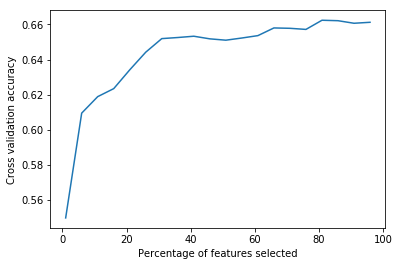

In [75]:
## For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, 
## and returns the optimal percentage of the most informative features to use. 
## Your approach should use k-fold cross-validation on the training data (you can use k=5).
## You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i) # Use Selection.SelectPercentile
    X_train_fs = fs.fit_transform(x_train, y_train)
    scores = model_selection.cross_val_score(linreg, X_train_fs, y_train, cv=5) ## Cross Validation
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(X.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

## 1.D 

Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. 

First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. 

You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. 

The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. 

Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [324]:
# Set X,y back to numpy array
X = np.array(X)
y = np.array(y)
X,y

(array([[ 8.  ,  0.19,  0.33, ...,  0.12,  0.26,  0.2 ],
        [53.  ,  0.  ,  0.16, ...,  0.02,  0.12,  0.45],
        [24.  ,  0.  ,  0.42, ...,  0.01,  0.21,  0.02],
        ...,
        [ 9.  ,  0.16,  0.37, ...,  0.08,  0.32,  0.18],
        [25.  ,  0.08,  0.51, ...,  0.03,  0.38,  0.33],
        [ 6.  ,  0.2 ,  0.78, ...,  0.11,  0.3 ,  0.05]]),
 array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48]))

In [335]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [336]:
X = comm1
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(X,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [411]:
# Lasso 
alpha = linspace(0.1,100,100)
lasso = Lasso()

In [408]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [103]:
#You should create a function that takes as input the data and target variable; the parameter to vary and a 
#list of its values; the model to be trained; and any other relevant input needed 
#to determine the optimal value for the specified parameter.

def comparison(x,y,a):
    for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))]:
        
        met.fit(x,y)
        p = met.predict(x)
        e = p-y
        total_error = np.dot(e,e)
        rmse_train = np.sqrt(total_error/len(p))

        #kf = KFold(len(x), n_folds=5)
        kf = KFold(n_splits=5)
        kf.get_n_splits(x)

        KFold(n_splits=n,random_state=None, shuffle=False)
        err = 0
        for train,test in kf.split(x):
            met.fit(x[train],y[train])
            p = met.predict(x[test])
            e = p-y[test]
            err += np.dot(e,e)
        rmse_5cv = np.sqrt(err/len(x))
    
        print('Method: %s' %name)
        print('RMSE on training: %.4f' %rmse_train)
        print('RMSE on 5-fold CV: %.4f' %rmse_5cv)
        print ("\n")

alpha  =  0.1
alpha  =  1.1090909090909091
alpha  =  2.118181818181818
alpha  =  3.1272727272727274
alpha  =  4.136363636363636
alpha  =  5.145454545454545
alpha  =  6.154545454545454
alpha  =  7.163636363636363
alpha  =  8.172727272727272
alpha  =  9.181818181818182
alpha  =  10.19090909090909
alpha  =  11.2
alpha  =  12.209090909090909
alpha  =  13.218181818181817
alpha  =  14.227272727272727
alpha  =  15.236363636363635
alpha  =  16.245454545454546
alpha  =  17.254545454545454
alpha  =  18.263636363636365
alpha  =  19.272727272727273
alpha  =  20.28181818181818
alpha  =  21.290909090909093
alpha  =  22.3
alpha  =  23.30909090909091
alpha  =  24.31818181818182
alpha  =  25.327272727272728
alpha  =  26.336363636363636
alpha  =  27.345454545454544
alpha  =  28.354545454545455
alpha  =  29.363636363636363
alpha  =  30.37272727272727
alpha  =  31.381818181818183
alpha  =  32.39090909090909
alpha  =  33.4
alpha  =  34.40909090909091
alpha  =  35.418181818181814
alpha  =  36.42727272727273

(array([0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69,
        0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69,
        0.69, 0.69, 0.69, 0.69]),
 array([0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
        0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
        0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
        0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
      

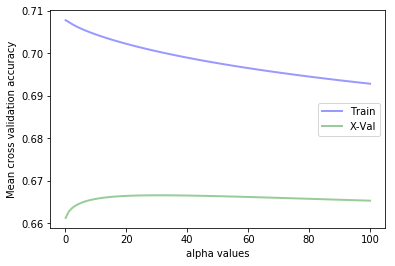

In [412]:
# Ridge
calc_params(x_train, y_train, ridge, alpha,'alpha',5)

alpha  =  0.1
alpha  =  1.1090909090909091
alpha  =  2.118181818181818
alpha  =  3.1272727272727274
alpha  =  4.136363636363636
alpha  =  5.145454545454545
alpha  =  6.154545454545454
alpha  =  7.163636363636363
alpha  =  8.172727272727272
alpha  =  9.181818181818182
alpha  =  10.19090909090909
alpha  =  11.2
alpha  =  12.209090909090909
alpha  =  13.218181818181817
alpha  =  14.227272727272727
alpha  =  15.236363636363635
alpha  =  16.245454545454546
alpha  =  17.254545454545454
alpha  =  18.263636363636365
alpha  =  19.272727272727273
alpha  =  20.28181818181818
alpha  =  21.290909090909093
alpha  =  22.3
alpha  =  23.30909090909091
alpha  =  24.31818181818182
alpha  =  25.327272727272728
alpha  =  26.336363636363636
alpha  =  27.345454545454544
alpha  =  28.354545454545455
alpha  =  29.363636363636363
alpha  =  30.37272727272727
alpha  =  31.381818181818183
alpha  =  32.39090909090909
alpha  =  33.4
alpha  =  34.40909090909091
alpha  =  35.418181818181814
alpha  =  36.42727272727273

(array([0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]),
 array([ 0.39, -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
        -0.  ,

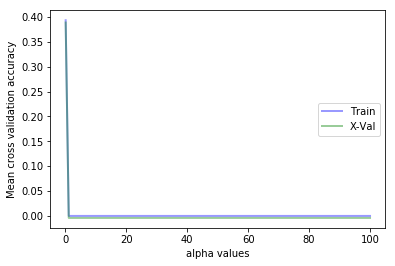

In [414]:
#Lasso
calc_params(x_train, y_train, lasso, alpha,'alpha',5)

In [110]:
# With Alpha = .1
comparison(x_train,y_train,.1)

Method: linear regression
RMSE on training: 0.1258
RMSE on 5-fold CV: 0.1342


Method: lasso
RMSE on training: 0.2260
RMSE on 5-fold CV: 0.2262


Method: ridge
RMSE on training: 0.1261
RMSE on 5-fold CV: 0.1334


Method: elastic-net
RMSE on training: 0.2258
RMSE on 5-fold CV: 0.2261




In [114]:
# With Alpha = .2
comparison(x_train,y_train,.2)

Method: linear regression
RMSE on training: 0.1258
RMSE on 5-fold CV: 0.1342


Method: lasso
RMSE on training: 0.2261
RMSE on 5-fold CV: 0.2263


Method: ridge
RMSE on training: 0.1261
RMSE on 5-fold CV: 0.1333


Method: elastic-net
RMSE on training: 0.2258
RMSE on 5-fold CV: 0.2261




In [113]:
# With Alpha = .3
comparison(x_train,y_train,.3)

Method: linear regression
RMSE on training: 0.1258
RMSE on 5-fold CV: 0.1342


Method: lasso
RMSE on training: 0.2265
RMSE on 5-fold CV: 0.2268


Method: ridge
RMSE on training: 0.1263
RMSE on 5-fold CV: 0.1332


Method: elastic-net
RMSE on training: 0.2260
RMSE on 5-fold CV: 0.2262




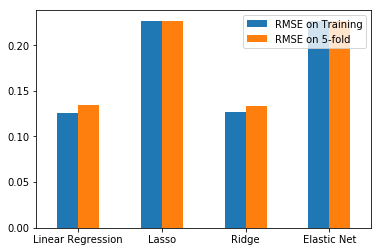

In [133]:
## plot
pl = {'Linear Regression':[0.1258,0.1342],
                  'Lasso':[0.2265,0.2268],
                  'Ridge':[0.1263,0.1332],
                  'Elastic Net':[0.2260,0.2262]}
pl_df = pd.DataFrame(pl, index = ['RMSE on Training','RMSE on 5-fold'])


pl_df=pl_df.T

pl_df.plot.bar(rot=0)

## Discussion
Compared Linear, Ridge and Lasso regression.
    To Begin with, the Linear regression with cross-validation 10 fold perform with RMSE at .1358
    and .1288 on training dataset. Train dataset was perform better in this case, but the score wasn't too 
    far from the each other.
    
    Second, Lasso and Elastic Net seem to have close performance at RMSE from train and cv are at the same range.
    Linear and Ridge are in the same situation the they perform and show the similar RMSE to each other.

## 1.e

Next, perform regression using Stochastic Gradient Descent for regression.

For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. 

SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. 

For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10).

Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. 

[Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = comm1
y = comm['ViolentCrimesPerPop'] 

## Standardized Features
scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=33)

In [345]:
#Import Grid Search and SGD Regressor
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

In [346]:
# For RMSE
x = np.array(x)
x.shape

(1994, 97)

In [347]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

sgdreg = SGDRegressor(penalty='l2', alpha=0.1, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=10)
kf.get_n_splits(x)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0
for train,test in kf.split(x):
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1348
RMSE on 10-fold CV: 0.1413


[Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [387]:
# Grid Search
gs = GridSearchCV(SGDRegressor(),param_grid={"penalty":['l2', 'l1'], 'alpha' :np.linspace(0.0001, 15, 100)})
gs.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0....
        7.58,  7.73,  7.88,  8.03,  8.18,  8.33,  8.48,  8.64,  8.79,  8.94,
        9.09,  9.24,  9.39,  9.55,  9.7 ,  9.85, 10.  , 10.15, 10.3 , 10.45,
       10.61, 10.76, 10.91, 11.06, 11.21, 11.36, 11.52, 11.67, 11.82, 11.97,
       12.12, 12.27, 12.42, 12.58, 12.73, 12.88, 13.03, 13.18, 13.33, 13.48,
       13.64, 13.79

In [388]:
for (i, j) in gs.best_params_.items():
    sgdreg.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    print("\n")

The optimum value of alpha is estimated as 0.0001


The optimum value of penalty is estimated as l2




In [390]:
print('Choose best parameter by Gridsearch : %s' % gs.best_params_ , gs.best_score_)

Choose best parameter by Gridsearch : {'alpha': 0.0001, 'penalty': 'l2'} 0.6597840900218798


In [389]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.0001, max_iter=300)
sgdreg.fit(x_test,y_test)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=300,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter.

l1_ratio  =  0.0001
l1_ratio  =  0.010199999999999999
l1_ratio  =  0.0203
l1_ratio  =  0.0304
l1_ratio  =  0.0405
l1_ratio  =  0.0506
l1_ratio  =  0.060700000000000004
l1_ratio  =  0.0708
l1_ratio  =  0.0809
l1_ratio  =  0.091
l1_ratio  =  0.1011
l1_ratio  =  0.1112
l1_ratio  =  0.1213
l1_ratio  =  0.1314
l1_ratio  =  0.1415
l1_ratio  =  0.15159999999999998
l1_ratio  =  0.16169999999999998
l1_ratio  =  0.17179999999999998
l1_ratio  =  0.18189999999999998
l1_ratio  =  0.19199999999999998
l1_ratio  =  0.20209999999999997
l1_ratio  =  0.21219999999999997
l1_ratio  =  0.22229999999999997
l1_ratio  =  0.23239999999999997
l1_ratio  =  0.2425
l1_ratio  =  0.2526
l1_ratio  =  0.2627
l1_ratio  =  0.2728
l1_ratio  =  0.2829
l1_ratio  =  0.293
l1_ratio  =  0.3031
l1_ratio  =  0.3132
l1_ratio  =  0.3233
l1_ratio  =  0.3334
l1_ratio  =  0.34349999999999997
l1_ratio  =  0.35359999999999997
l1_ratio  =  0.36369999999999997
l1_ratio  =  0.37379999999999997
l1_ratio  =  0.38389999999999996
l1_ratio  = 

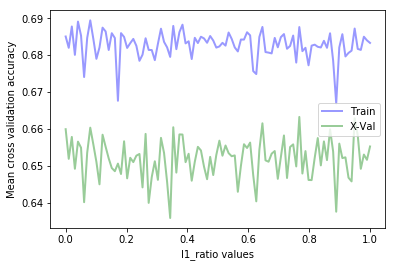

In [407]:
l1_ratio = np.linspace(0.0001,1, 100)
sgd = SGDRegressor(penalty='elasticnet')
calc_params(x_train, y_train, sgd, l1_ratio,'l1_ratio',5)

In [415]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.0001, max_iter=300)
scores = model_selection.cross_val_score(sgdreg, X_train_fs, y_train, cv=5)
print ("Alpha criterion accuracy on cv: {0:.3f}".format(scores.mean()))


Alpha criterion accuracy on cv: 0.653


## 2

### 2.b

In [4]:
# Load Data
classes = pd.read_csv('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/newsgroups5/classes.txt', header = None,sep = ' ',skiprows = 1,index_col = 0)
matrix = pd.read_csv('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/newsgroups5/matrix.txt', header = None)
matrix_t = matrix.T
term = pd.read_csv('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/newsgroups5/terms.txt', header = None, dtype = str )



In [64]:
classes =np.genfromtxt('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/newsgroups5/classes.txt', skip_header=1, usecols=(1),dtype=str)

matrix = np.genfromtxt('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/newsgroups5/matrix.txt', delimiter=",",dtype=int)
matrix_t = matrix.T

term = np.genfromtxt('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/newsgroups5/terms.txt', delimiter=",",dtype=str)


In [1]:
classes

NameError: name 'classes' is not defined

In [68]:
matrix_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
term

array(['aa', 'aargh', 'aaron', ..., 'zw', 'zx', 'zz'], dtype='<U30')

### 2.a

In [70]:
def distCosine(vecA,vecB):
    normA = linalg.norm(vecA)
    normB = linalg.norm(vecB)
    sims = dot(vecA,vecB)/(normA * normB)
    dists = 1 - sims
    return dists

In [71]:
# Function Use through Kmeans
def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k)
	return centroids 

def kMeans(dataSet, k, distMeas=distCosine, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            
            
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distCosine):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment



In [72]:
numTerms=len(term)
numTerms

9328

#### Next, we will transform the data to TFxIDF weights (this is not necessary for clustering, but we will do it here for illustration purposes):

In [73]:
# With training Set
# Find doucment frequencies for each term

DF = np.array([(matrix_t!=0).sum(0)])
print (DF)

[[10  6 22 ...  3  3  4]]


In [74]:
NDocs = len(matrix_t[0])
print (NDocs)

9328


In [75]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(matrix_t), dtype=float)*NDocs

In [76]:
# Convert each entry into IDF values
# Note that IDF is only a function of the term, so all rows will be identical.
DivM = np.divide(NMatrix, matrix_t)
IDF = np.log2(DivM)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
# Finally compute the TFxIDF values for each document-term entry
matrix_t_tfidf = matrix_t * IDF

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [79]:
matrix_t_tfidf[np.isnan(matrix_t_tfidf)]=0

In [80]:
matrix_t_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
# Split data to train = 80 and test = 20 for tfidf and classes
from sklearn.model_selection import train_test_split , cross_validate
tfidf_train, tfidf_test, classes_train, classes_test = train_test_split(matrix_t_tfidf, classes, test_size=0.2)

In [82]:
print(tfidf_train.shape, tfidf_test.shape, classes_train.shape, classes_test.shape)

(2000, 9328) (500, 9328) (2000,) (500,)


In [120]:
centroids,clusters= kMeans(tfidf_train, 5, distCosine ,randCent)

In [129]:
centroids[4]

array([0. , 0. , 0. , ..., 3.3, 0. , 0. ])

In [134]:
centroids = np.array(centroids)
clusters = np.array(clusters)
print ("\t\tCluster0\tCluster1\tCluster2\tCluster3\tCluster4")
for i in range(len(term)):
    print ("%10s\t%.4f\t\t%.4f\t\t%.4f\t\t%.4f\t\t%.4f" %(term[i],centroids[0][i],centroids[1][i],centroids[2][i],centroids[3][i],centroids[4][i]))

		Cluster0	Cluster1	Cluster2	Cluster3	Cluster4
        aa	9.9988		0.0430		0.0000		0.0655		0.0000
     aargh	0.0000		0.0671		0.0000		0.0000		0.0000
     aaron	0.0000		0.5429		0.0000		0.0630		0.0000
    aaronc	0.0000		0.0861		0.0000		0.0000		0.0000
        ab	20.3223		0.0319		4.3958		0.0794		0.0000
   abandon	0.0000		0.0654		0.0000		0.0328		0.0000
       abc	0.0000		0.4652		0.0000		0.0164		0.0000
      abid	0.0000		0.0430		0.0000		0.0000		0.0000
      abil	1.4653		0.5400		0.0000		0.1937		0.0000
       abl	0.0000		1.2820		0.0000		0.8008		0.0000
    abomin	0.0000		0.0726		0.0000		0.0000		0.0000
     abort	0.0000		0.0224		0.0000		0.0164		0.0000
    abound	0.0000		0.0336		0.0000		0.0000		0.0000
   abraham	0.0000		0.0766		0.0000		0.0000		0.0000
    abridg	0.0000		0.0336		0.0000		0.0000		0.0000
    abroad	0.0000		0.0637		0.0000		0.0000		0.0000
    absenc	0.0000		0.1173		0.0000		0.0000		0.0000
    absent	0.0000		0.0447		0.0000		0.0000		0.0000
   absolut	0.0000		0.7236		0.0000		0.1802		0.0000
  

      debt	0.0000		0.0336		0.0000		0.0000		0.0000
     debug	0.0000		0.0000		0.0000		0.0328		0.0000
       dec	0.0000		0.0319		0.0000		0.2096		0.0000
     decad	0.0000		0.1610		0.0000		0.0000		0.0000
    deceit	0.0000		0.0336		0.0000		0.0000		0.0000
    deceiv	0.0000		0.0671		0.0000		0.0000		0.0000
    decemb	0.0000		0.0743		0.0000		0.0164		0.0000
   decenso	0.0000		0.0336		0.0000		0.0000		0.0000
    decent	0.0000		0.2986		0.0000		0.0958		0.0000
    decept	0.0000		0.0559		0.0000		0.0000		0.0000
     decid	0.0000		0.8901		0.0000		0.2293		0.0000
     decim	0.0000		0.0336		0.0000		0.0000		0.0000
    deciph	0.0000		0.1492		0.0000		0.0000		0.0000
     decis	0.0000		0.7216		0.0000		0.0933		0.0000
      deck	0.0000		0.0112		0.0000		0.1823		0.0000
    declar	0.0000		0.2627		0.0000		0.0000		0.0000
declassifi	0.0000		0.0447		0.0000		0.0000		0.0000
    declin	0.0000		0.0224		0.0000		0.0164		0.0000
     decod	0.0000		0.1996		0.0000		0.0000		0.0000
decompress	0.0000		0.0112		0.0000		0.0328		0.0000


hammerslag	0.0000		0.0336		0.0000		0.0000		0.0000
   hammond	0.0000		0.0336		0.0000		0.0000		0.0000
   hampton	0.0000		0.0224		0.0000		0.0000		0.0000
   hamrlik	0.0000		0.0319		0.0000		0.0000		0.0000
   hamster	0.0000		0.0224		0.0000		0.0000		0.0000
       han	0.0000		0.1213		0.0000		0.1678		0.0000
   hancock	0.0000		0.0112		0.0000		0.0491		0.0000
hancrcdocdiv	0.0000		0.0224		0.0000		0.0000		0.0000
      hand	0.0000		1.5050		0.0000		0.2432		0.0000
  handbook	0.0000		0.0000		0.0000		0.0328		0.0000
   handgun	0.0000		0.0447		0.0000		0.0164		0.0000
  handheld	0.0000		0.0000		0.0000		0.0958		0.0000
     handi	0.0000		0.0447		0.0000		0.0655		0.0000
  handicap	0.0000		0.0000		0.0000		0.0328		0.0000
     handl	0.0000		0.2667		0.0000		0.3926		0.0000
hanegraaff	0.0000		0.0336		0.0000		0.0000		0.0000
      hang	0.0000		0.1230		0.0000		0.1798		0.0000
      hank	0.0000		0.0430		0.0000		0.0000		0.0000
    hannan	0.0000		0.0430		0.0000		0.0000		0.0000
     hannu	0.0000		0.0224		0.0000		0.0000		0.000

     mount	0.0000		0.0542		0.0000		0.2849		0.0000
  mountain	0.0000		0.1437		0.0000		0.0328		0.0000
     mourn	0.0000		0.0336		0.0000		0.0000		0.0000
      mous	0.0000		0.0224		0.0000		2.3307		0.0000
  mousecom	0.0000		0.0000		0.0000		0.1613		0.0000
   mousesi	0.0000		0.0000		0.0000		0.0655		0.0000
 mousetrap	0.0000		0.0000		0.0000		0.0491		0.0000
     mouth	0.0000		0.1213		0.0000		0.0328		0.0000
      move	0.0000		1.1072		0.0000		0.9693		3.2968
  movement	0.0000		0.1325		0.0000		0.0000		0.0000
      movi	0.0000		0.0542		0.0000		0.1891		0.0000
mozartcciupedu	0.0000		0.0990		0.0000		0.0000		0.0000
        mp	37.4493		0.0525		91.1219		0.0491		45.1438
     mpaul	0.0000		0.0336		0.0000		0.0000		0.0000
       mpf	2.9305		0.0000		0.0000		0.0000		0.0000
       mpg	1.4653		0.0000		0.0000		0.0303		3.2968
       mpt	4.1736		0.0000		0.0000		0.0000		0.0000
        mq	87.2925		0.0000		115.3433		0.0000		70.2366
       mqq	1.4653		0.0000		0.0000		0.0000		6.5937
       mqr	14.1179		0.0000		0.0000		0.0

     ronni	0.0000		0.0447		0.0000		0.0000		0.0000
      roof	0.0000		0.0112		0.0000		0.0491		0.0000
     rooki	0.0000		0.1515		0.0000		0.0675		0.0000
      room	0.0000		0.2952		0.0000		0.0819		0.0000
      root	0.0000		0.1637		0.0000		0.0819		0.0000
      rope	0.0000		0.0224		0.0000		0.0303		0.0000
      rose	0.0000		0.2074		0.0000		0.1435		0.0000
   rosecom	0.0000		0.0224		0.0000		0.0000		0.0000
  rosemail	0.0000		0.0224		0.0000		0.0000		0.0000
   rosenet	0.0000		0.0224		0.0000		0.0000		0.0000
  roseread	0.0000		0.0224		0.0000		0.0000		0.0000
   rospach	0.0000		0.0620		0.0000		0.0000		0.0000
      ross	0.0000		0.1308		0.0000		0.0924		0.0000
    roster	0.0000		0.1526		0.0000		0.0000		0.0000
     rotat	0.0000		0.0224		0.0000		0.0303		0.0000
    rotten	0.0000		0.0224		0.0000		0.0000		0.0000
     rough	0.0000		0.1888		0.0000		0.0000		0.0000
   roughli	0.0000		0.0671		0.0000		0.0164		0.0000
     round	0.0000		0.7848		0.0000		0.0958		0.0000
 roundtrip	0.0000		0.0000		0.0000		0.0328		0.0000


     width	0.0000		0.0000		0.0000		0.0655		0.0000
     wierd	0.0000		0.0430		0.0000		0.0000		0.0000
      wife	0.0000		0.4203		0.0000		0.0655		0.0000
       wil	0.0000		0.0112		0.0000		0.0000		0.0000
      wild	0.0000		0.0447		0.0000		0.0819		0.0000
    wilder	0.0000		0.0430		0.0000		0.0164		0.0000
 wildstrom	0.0000		0.0000		0.0000		0.0655		0.0000
wilikienghawaiiedu	0.0000		0.0000		0.0000		0.1375		0.0000
 wilkerson	0.0000		0.0637		0.0000		0.0000		0.0000
      will	0.0000		0.6617		0.0000		0.2785		0.0000
     willi	0.0000		0.1481		0.0000		0.0000		0.0000
   william	0.0000		0.3305		0.0000		0.2522		0.0000
   willing	0.0000		0.0336		0.0000		0.0000		0.0000
    wilson	0.0000		0.1262		0.0000		0.2397		0.0000
       win	0.0000		2.3138		0.0000		0.8674		0.0000
  winbench	0.0000		0.0620		0.0000		0.1840		0.0000
      wind	0.0000		0.0559		0.0000		0.0164		0.0000
    window	9.5902		0.2145		0.0000		11.7902		0.0000
 windowsnt	0.0000		0.0000		0.0000		0.0491		0.0000
      wine	0.0000		0.0542		0.0000		0.0000

In [143]:
terms_dict = dict(zip(term, np.array((matrix_t!=0).sum(0))))

In [87]:
print(clusters.shape)
print(centroids.shape)

(2000, 2)
(5, 9328)


In [96]:
centroids_df = pd.DataFrame(centroids)
clusters_df  = pd.DataFrame(clusters,columns = ['cluster','dist'])
clusters_df.head()

,cluster,dist
0,0.0,0.541270
1,0.0,0.516180
2,0.0,0.720977
3,0.0,0.752312
4,0.0,0.722180


In [190]:
counts=clusters_df['cluster'].value_counts()
counts

0.0    1602
2.0     366
4.0      19
3.0      10
1.0       3
Name: cluster, dtype: int64

In [116]:
print(counts[0],counts[1],counts[2],counts[3],counts[4])

1602 3 366 10 19


In [156]:
n=5
for i in range(len(centroids)):
        print("\nCluster:",i+1)
        centroids2=centroids[i,:]
        temp = np.ravel(centroids[i,:])
        ind = np.argpartition(temp, -n)[-n:]
        ind = ind[np.argsort(-temp[ind])]
        print("\tTerms\t\tDF\t\tCluster")
        for index in ind:
            print("%15s\t\t%.2f\t\t%.3f" %(term[index],terms_dict[term[index]],temp[index]))


Cluster: 1
	Terms		DF		Cluster
             cx		9.00		226.979
             uw		12.00		156.364
             ah		24.00		124.985
             mw		17.00		98.775
             sp		27.00		97.902

Cluster: 2
	Terms		DF		Cluster
        subject		2500.00		14.257
             on		973.00		12.125
          write		1183.00		10.741
            god		312.00		8.777
         articl		888.00		8.002

Cluster: 3
	Terms		DF		Cluster
             ax		15.00		3959.650
            max		19.00		1700.895
             pl		20.00		434.766
            bxn		8.00		280.418
            giz		8.00		241.473

Cluster: 4
	Terms		DF		Cluster
        subject		2500.00		13.643
         window		381.00		11.790
           file		257.00		7.210
           sale		326.00		5.830
             do		318.00		5.532

Cluster: 5
	Terms		DF		Cluster
            max		19.00		1992.039
             pl		20.00		323.970
            giz		8.00		176.172
             qq		10.00		110.981
            asq		7.00		83.591


In [172]:
for i in range(len(centroids)):
    temp = np.ravel(centroids[i,:])
    ind = np.argpartition(temp,-n)[-n:]
    print(ind)

[7664 5426  143 8689 1914]
[ 417 3345 9129 5795 7895]
[3302 1052 6183 4982  547]
[2296 7895 9025 7115 2933]
[ 442 6534 3302 4982 6183]


numpy.ndarray

In [183]:
# Function for Document Cluster
def cluster_word(n,centroids,term):
    for i in range(len(centroids)):
            print("\nCluster:",i+1)
            print('\nNumber of Documents:',counts[i])
            centroids2=centroids[i,:]
            temp = np.ravel(centroids[i,:])
            ind = np.argpartition(temp, -n)[-n:]
            ind = ind[np.argsort(-temp[ind])]
            print("\tTerms\t\tDF\t\tCluster")
            for index in ind:
                print("%15s\t\t%.2f\t\t%.3f" %(term[index],terms_dict[term[index]],temp[index]))

In [184]:
cluster_word(5,centroids,term)


Cluster: 1

Number of Documents: 1602
	Terms		DF		Cluster
             cx		9.00		226.979
             uw		12.00		156.364
             ah		24.00		124.985
             mw		17.00		98.775
             sp		27.00		97.902

Cluster: 2

Number of Documents: 3
	Terms		DF		Cluster
        subject		2500.00		14.257
             on		973.00		12.125
          write		1183.00		10.741
            god		312.00		8.777
         articl		888.00		8.002

Cluster: 3

Number of Documents: 366
	Terms		DF		Cluster
             ax		15.00		3959.650
            max		19.00		1700.895
             pl		20.00		434.766
            bxn		8.00		280.418
            giz		8.00		241.473

Cluster: 4

Number of Documents: 10
	Terms		DF		Cluster
        subject		2500.00		13.643
         window		381.00		11.790
           file		257.00		7.210
           sale		326.00		5.830
             do		318.00		5.532

Cluster: 5

Number of Documents: 19
	Terms		DF		Cluster
            max		19.00		1992.039
             pl		20.00		323.970
            g

In [228]:
## Practice function in NP including (partition,argpartition, argsort, ravel)
x = np.array([3, 4, 2, 1])
# Give result
np.partition(x,3)

# give index
np.argpartition(x,-n)

# Return Index of sorting values
np.argsort(x)

array([3, 2, 0, 1])

## 2.d

#### Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

#### Homogeneity: each cluster contains only members of a single class. Completeness: all members of a given class are assigned to the same cluster.

In [191]:
from sklearn.metrics import completeness_score, homogeneity_score

In [200]:
print(tfidf_train.shape, tfidf_test.shape, classes_train.shape, classes_test.shape)

(2000, 9328) (500, 9328) (2000,) (500,)


In [ ]:
## For Training dataset only

In [227]:
print('Completeness:',completeness_score(classes_train,clusters.T[0]))
print('Homogeneity:',homogeneity_score(classes_train,clusters.T[0]))

Completeness: 0.6449186735353865
Homogeneity: 0.2902958187092049


## 2.e

#### Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [ ]:
######## For test set.

In [230]:
centroids_t,clusters_t= kMeans(tfidf_test, 5, distCosine ,randCent)

In [231]:
centroids_df_test = pd.DataFrame(centroids_t)
clusters_df_test  = pd.DataFrame(clusters_t,columns = ['cluster','dist'])
clusters_df_test.head()

,cluster,dist
0,0.0,0.541414
1,1.0,0.162204
2,0.0,0.494147
3,2.0,0.331970
4,0.0,0.581370


In [233]:
cluster_word(5,centroids_t,term)


Cluster: 1

Number of Documents: 1602
	Terms		DF		Cluster
        subject		2500.00		14.162
             on		973.00		12.014
            god		312.00		11.261
          write		1183.00		10.716
          peopl		522.00		9.642

Cluster: 2

Number of Documents: 3
	Terms		DF		Cluster
             db		10.00		37.393
           team		242.00		17.812
           game		338.00		15.888
           plai		266.00		14.332
        subject		2500.00		13.187

Cluster: 3

Number of Documents: 366
	Terms		DF		Cluster
        subject		2500.00		13.897
           sale		326.00		8.865
          email		422.00		7.135
          pleas		421.00		5.448
          offer		211.00		5.336

Cluster: 4

Number of Documents: 10
	Terms		DF		Cluster
         window		381.00		28.949
        subject		2500.00		14.576
           file		257.00		11.937
             do		318.00		11.928
            run		274.00		8.424

Cluster: 5

Number of Documents: 19
	Terms		DF		Cluster
             ax		15.00		2273.981
            max		19.00		849.220
          

In [234]:
print('Completeness:',completeness_score(classes_test,clusters_t.T[0]))
print('Homogeneity:',homogeneity_score(classes_test,clusters_t.T[0]))

Completeness: 0.611145850896071
Homogeneity: 0.4897008160714857


# 3 PCA

## 3.a
#### Load data 

In [235]:
%pwd

'/Users/pariponthanthong/Desktop/DSC 478/Assignment 3'

In [248]:
img_data = pd.read_csv('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/segmentation_data/segmentation_data.txt',header = None)


classes =pd.read_csv('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/segmentation_data/segmentation_classes.txt',sep = '\t', header = None)

In [258]:
img_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


### Normalized data with min max range to [ 0, 1 ] range

In [259]:
## Scale img_data(data matrix) with min-max [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(img_data)
img_data_norm = pd.DataFrame(X_train_minmax)
img_data_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.430830,0.741667,0.0,0.0,0.0,0.034221,0.000672,0.027329,0.000856,0.090111,0.079417,0.061119,0.130943,0.731343,0.014118,0.872865,0.123711,0.508139,0.831849
1,0.335968,0.733333,0.0,0.0,0.0,0.038023,0.000726,0.032298,0.000541,0.095791,0.085089,0.068483,0.134840,0.729478,0.023529,0.859583,0.127393,0.463329,0.836986
2,0.885375,0.970833,0.0,0.0,0.0,0.115970,0.002213,0.067081,0.001097,0.085463,0.075365,0.061856,0.120031,0.736940,0.038824,0.827324,0.113402,0.480149,0.844782
3,0.181818,0.920833,0.0,0.0,0.0,0.043726,0.001265,0.022360,0.000645,0.088562,0.080227,0.059647,0.127046,0.748134,0.014118,0.855787,0.120029,0.500966,0.825889
4,0.379447,0.729167,0.0,0.0,0.0,0.039924,0.000697,0.026087,0.000725,0.108701,0.101297,0.078056,0.148090,0.748134,0.010588,0.861480,0.139912,0.442661,0.823924


## 3.b

In [353]:
# Perform K mean with 7 cluster 
kmean = KMeans(n_clusters = 7,max_iter=500, verbose=1)
kmean.fit(img_data_norm)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 393.83705354372137
start iteration
done sorting
end inner loop
Iteration 1, inertia 371.6946834509623
start iteration
done sorting
end inner loop
Iteration 2, inertia 366.7435843156584
start iteration
done sorting
end inner loop
Iteration 3, inertia 362.9678243636614
start iteration
done sorting
end inner loop
Iteration 4, inertia 358.8764106078849
start iteration
done sorting
end inner loop
Iteration 5, inertia 352.90775331550435
start iteration
done sorting
end inner loop
Iteration 6, inertia 350.75449642566787
start iteration
done sorting
end inner loop
Iteration 7, inertia 350.12522698143096
start iteration
done sorting
end inner loop
Iteration 8, inertia 350.0374041818567
start iteration
done sorting
end inner loop
Iteration 9, inertia 350.01207974106956
start iteration
done sorting
end inner loop
Iteration 10, inertia 350.01207974106956
center shift 0.000000e+00 within tolerance 4.150157e-06


Iteration 13, inertia 374.0612781973558
start iteration
done sorting
end inner loop
Iteration 14, inertia 374.0071280570624
start iteration
done sorting
end inner loop
Iteration 15, inertia 373.95714658420576
start iteration
done sorting
end inner loop
Iteration 16, inertia 373.9322647201597
start iteration
done sorting
end inner loop
Iteration 17, inertia 373.92283584588813
start iteration
done sorting
end inner loop
Iteration 18, inertia 373.9195973441899
start iteration
done sorting
end inner loop
Iteration 19, inertia 373.9137696986145
start iteration
done sorting
end inner loop
Iteration 20, inertia 373.90316834167515
start iteration
done sorting
end inner loop
Iteration 21, inertia 373.89954202624256
start iteration
done sorting
end inner loop
Iteration 22, inertia 373.89275055312623
start iteration
done sorting
end inner loop
Iteration 23, inertia 373.8754097715692
start iteration
done sorting
end inner loop
Iteration 24, inertia 373.85040320667997
start iteration
done sorting
e

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [354]:
clusters1 = kmean.predict(img_data_norm)
print(clusters)
print('\n')
# print centroids
print (kmean.cluster_centers_)

[0 0 0 ... 4 4 2]


[[0.25 0.46 0.   0.03 0.01 0.04 0.   0.03 0.   0.03 0.02 0.04 0.02 0.77
  0.22 0.51 0.04 0.8  0.18]
 [0.3  0.53 0.   0.05 0.05 0.1  0.01 0.08 0.01 0.4  0.37 0.47 0.35 0.5
  0.57 0.21 0.47 0.3  0.16]
 [0.77 0.43 0.   0.01 0.02 0.04 0.   0.02 0.   0.04 0.04 0.06 0.03 0.78
  0.22 0.49 0.06 0.54 0.24]
 [0.51 0.81 0.   0.08 0.01 0.05 0.   0.05 0.   0.11 0.09 0.09 0.14 0.68
  0.08 0.82 0.13 0.41 0.89]
 [0.54 0.15 0.   0.03 0.   0.03 0.   0.03 0.   0.82 0.78 0.89 0.79 0.27
  0.67 0.29 0.89 0.21 0.13]
 [0.75 0.53 0.   0.04 0.04 0.11 0.02 0.11 0.02 0.3  0.28 0.35 0.27 0.59
  0.45 0.31 0.35 0.3  0.16]
 [0.26 0.39 0.   0.07 0.02 0.08 0.   0.06 0.   0.15 0.14 0.19 0.12 0.72
  0.34 0.36 0.19 0.41 0.2 ]]


In [318]:
# Class name
word = np.unique(classes[0])
word

array(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
      dtype=object)

In [306]:
# Tranform Data into word
le = preprocessing.LabelEncoder()
le.fit(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'])

LabelEncoder()

In [307]:
list(le.classes_)

['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW']

In [324]:
a = le.transform(classes[0])
print(a)
print(a.shape)
print(word)
print(np.unique(a))

[3 3 3 ... 1 1 1]
(2100,)
['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
[0 1 2 3 4 5 6]


In [355]:
###  completeness and homogeneity
print(completeness_score(a,clusters1))
print(homogeneity_score(a,clusters1))

0.613187012485301
0.6115021163370862


## 3.c

In [326]:
from sklearn import decomposition

In [356]:
pca = decomposition.PCA()
img_Trans = pca.fit_transform(img_data_norm)
img_Trans

array([[-0.69,  0.53,  0.25, ..., -0.  ,  0.  ,  0.  ],
       [-0.67,  0.51,  0.34, ...,  0.  , -0.  , -0.  ],
       [-0.71,  0.77, -0.16, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.51, -0.13, -0.08, ..., -0.  ,  0.  ,  0.  ],
       [-0.48, -0.09, -0.16, ..., -0.  ,  0.  , -0.  ],
       [-0.44, -0.11, -0.05, ..., -0.  ,  0.  ,  0.  ]])

In [357]:
## All possible component
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


## 3c

In [358]:
# At 95% capture which will take around 6 component
pca1 = decomposition.PCA(n_components = 6)
img_Trans1 = pca1.fit_transform(img_data_norm)
img_Trans1

array([[-0.69,  0.53,  0.25, -0.2 , -0.08,  0.05],
       [-0.67,  0.51,  0.34, -0.17, -0.04,  0.06],
       [-0.71,  0.77, -0.16, -0.01, -0.17,  0.04],
       ...,
       [-0.51, -0.13, -0.08,  0.1 , -0.03, -0.03],
       [-0.48, -0.09, -0.16,  0.11,  0.  , -0.  ],
       [-0.44, -0.11, -0.05,  0.15,  0.02, -0.21]])

In [359]:
# 6 component that cath 95% of explained variance
# The PCA extract 6 features for 95% explained variance
print(pca1.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02]


In [360]:
check_95 = 0.61+0.13+0.1+0.05+0.04+0.02
check_95

0.9500000000000001

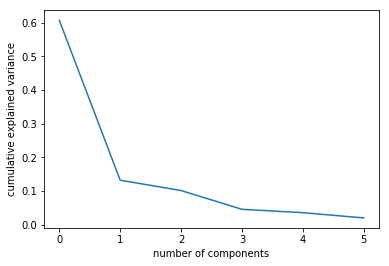

In [361]:
from matplotlib import*
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot((pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 3. d

In [362]:
kmean = KMeans(n_clusters =7,max_iter=500, verbose=1)
kmean.fit(img_Trans1)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 321.83732530654856
start iteration
done sorting
end inner loop
Iteration 1, inertia 276.612550781281
start iteration
done sorting
end inner loop
Iteration 2, inertia 262.0304274061095
start iteration
done sorting
end inner loop
Iteration 3, inertia 258.14433119228886
start iteration
done sorting
end inner loop
Iteration 4, inertia 257.1016891954412
start iteration
done sorting
end inner loop
Iteration 5, inertia 256.9260727020586
start iteration
done sorting
end inner loop
Iteration 6, inertia 256.8474647572346
start iteration
done sorting
end inner loop
Iteration 7, inertia 256.83524941340863
start iteration
done sorting
end inner loop
Iteration 8, inertia 256.83524941340863
center shift 0.000000e+00 within tolerance 1.236861e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 275.5384857751253
start iteration
done sorting
end inner loop
Iteration 1, inerti

Iteration 6, inertia 256.83947257730847
start iteration
done sorting
end inner loop
Iteration 7, inertia 256.8364189376309
center shift 2.615258e-03 within tolerance 1.236861e-05


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [363]:
#
clusters2 = kmean.predict(img_Trans1)
print(completeness_score(a,clusters2))
print(homogeneity_score(a,clusters2))

0.6092856703592695
0.6076335303210502


##### Discussing what founding.
 Compare the 1st cluster (K-mean with all feature) and 2nd cluster (K-mean with low dimesion)
 As you can see from the completeness and Homogeneity score that cluster one perform just slightly better than cluster 2. This may be it captured all of the features it may be hard to explained or learn from cluster one since every feature is on it. The cluster 2 has less dimension. This lower dimension perform at the same level as the first one refer to the barely different score.

## Extra Credit

In [364]:
%pwd

'/Users/pariponthanthong/Desktop/DSC 478/Assignment 3'

In [430]:
# Load matrix rating
# Don't load file through this process.
dataMat= np.genfromtxt('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/ex_credit/jokes/modified_jester_data.csv',delimiter=',')
dataMat.shape

(1000, 100)

In [454]:
from numpy import *
from numpy import linalg as la
import numpy as np

def ecludSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

# This function is not needed for Assignment 4, but may be useful for experimentation
def recommend(dataMat, user, N=3, simMeas=cosSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

# This function performs evaluatoin on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld and the rest are used to estimate the withheld ratings

def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsSim):
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = test_ratio * len(rated_items_by_user)
    test_indices = np.random.randint(0, len(rated_items_by_user), int(test_size))
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
    # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

def test(dataMat, test_ratio, estMethod):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, for all users
    totCount = 0
    totError = 0.0
    for user in range(dataMat.shape[0]):
        error , count = cross_validate_user(dataMat, user, test_ratio, estMethod)
        totError  += error
        totCount  += count
    MAE = (totError/totCount)
        
    print()
    print ('Mean Absoloute Error for ',estMethod,' : ',MAE)


In [ ]:
def knn(x, D, K,labels,measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    #return idx[:K], dists
    classCount={}          
    for i in range(K):
        voteIlabel = labels[idx[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return idx[:K],sortedClassCount[0][0]

In [488]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsSim):
# Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
# The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
# You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
# other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
# columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
# the queryJoke text as well as the text of the returned jokes.
    
    
def load_jokes(file):
    jokes = genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

def get_joke_text(jokes, id):
    return jokes[id]

# dataMat = genfromtxt('modified_jester_data.csv',delimiter=',')

# test(dataMat, 0.2, svdEst)
# test(dataMat, 0.2, standEst)

# jokes = load_jokes('jokes.csv')
# print_most_similar_jokes(dataMat, jokes, 3, 5, pearsSim)

In [455]:
test(dataMat, 0.2, standEst)


Mean Absoloute Error for  <function standEst at 0x118e1bd08>  :  3.685534030187866


In [465]:
#test(dataMat, 0.2, svdEst)

In [449]:
## Explore and Fix cross_validate_user function
## got error that cannot parse float to int
user = 10
test_ratio = 0.2
number_of_items = np.shape(dataMat)[1]
rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
test_size = test_ratio * len(rated_items_by_user)

test_indices = np.random.randint(0, len(rated_items_by_user), int(test_size))


In [510]:
jokes = load_jokes('/Users/pariponthanthong/Desktop/DSC 478/Assignment 3/ex_credit/jokes/jokes.csv')
jokes

array(['A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer\'s disease". The man replies "Well thank God I don\'t have cancer!"',
       'This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied "That\'s an awfully big word for a ten year old."',
       "Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert.",
       "Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.",
       "Q. What's O. J. Simpson's Internet address? A.\tSlash slash backslash slash slash escape.",
       "Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the 

In [513]:
def kNearestNeighbors(inX, dataSet, k, measure):
    distances = []
    for i in range(dataSet.shape[1]):
        vector = dataSet[:,i]
        distance = measure(inX, vector)
        distances.append(distance)
    #print "Before, distances is: ", distances
    distancesArray = np.array(distances)
    #print "After, distances is: ", distancesArray
    sortedDistIndicies = distancesArray.argsort()
    kNeighbors = zeros((k,dataSet.shape[1]))
    topIndicies = []
    classCount={}
    for i in range(k):
        #voteIlabel = labels[sortedDistIndicies[i]]
        kNeighbors[i,:] = dataSet[sortedDistIndicies[i],:]
        topIndicies.append(sortedDistIndicies[i])
        #print "sortedDistIndices: is", sortedDistIndicies
        #print "kNeighbors is: ", kNeighbors
        #classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #sortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1), reverse=True)
    return kNeighbors, topIndicies  #, sortedClassCount[0][0]

def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsSim):
    queryJokeVector = dataMat[:,queryJoke]
    print ("Selcted joke: ")
    print()
    print (jokes[queryJoke])
    print()
    dataMatArray = np.array(dataMat)
    knn, indicies = kNearestNeighbors(queryJokeVector, dataMat, k, metric)
    print ("The top %d recommended jokes are: "%(k))
    for ind in indicies:
        jok = jokes[ind]
        print()
        print (jok)
    #print "Done"

In [515]:
print_most_similar_jokes(dataMat, jokes, 3, 5, pearsSim)

Selcted joke: 

Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.

The top 5 recommended jokes are: 

A dog walks into Western Union and asks the clerk to send a telegram. He fills out a form on which he writes down the telegram he wishes to send: "Bow wow wow Bow wow wow."The clerk says "You can add another 'Bow wow' for the same price."The dog responded "Now wouldn't that sound a little silly?"

Q:  What did the blind person say when given some matzah?A:  Who the hell wrote this?

Q. Did you hear about the dyslexic devil worshipper? A. He sold his soul to Santa.

Q. What is orange and sounds like a parrot?  A. A carrot.

A guy goes into confession and says to the priest "Father I'm 80 years old widower with 11 grandchildren. Last night I met two beautiful flight attendants. They took me home and I made love to both of them. Twice."The priest said: "Well my son when was the last time you were in confession?" "Never Father I'm 